<a href="https://colab.research.google.com/github/qotic/dataset/blob/main/regress4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np

Import dataset

In [2]:
!wget -O soalregganda4.csv https://raw.githubusercontent.com/qotic/dataset/main/soalregganda4.csv

--2022-04-21 07:48:24--  https://raw.githubusercontent.com/qotic/dataset/main/soalregganda4.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1092 (1.1K) [text/plain]
Saving to: ‘soalregganda4.csv’

soalregganda4.csv   100%[===================>]   1.07K  --.-KB/s    in 0s      

2022-04-21 07:48:24 (62.3 MB/s) - ‘soalregganda4.csv’ saved [1092/1092]



In [3]:
data_df = pd.read_csv('soalregganda4.csv')
data_df.head()

,N,Y,X1,X2,X3,X4
0,1,80250,1650000,10,1,80250
1,2,86000,1600000,8,1,86000
2,3,106000,2050000,8,1,106000
3,4,70108,1200000,7,1,70108
4,5,680400,1650000,4,2,170100


In [4]:
data_df.drop(columns=['N'], inplace=True)
data_df.head()

,Y,X1,X2,X3,X4
0,80250,1650000,10,1,80250
1,86000,1600000,8,1,86000
2,106000,2050000,8,1,106000
3,70108,1200000,7,1,70108
4,680400,1650000,4,2,170100


define x and y

In [5]:
x=data_df.drop(['Y'],axis=1).values
y=data_df['Y'].values

In [6]:
print (x)

[[1650000      10       1   80250]
 [1600000       8       1   86000]
 [2050000       8       1  106000]
 [1200000       7       1   70108]
 [1650000       4       2  170100]
 [1500000       8       2   66100]
 [1500000       8       1   66100]
 [1450000       7       3   55500]
 [1250000       8       2   55500]
 [1525000       9       1   72500]
 [ 600000       7       4  108000]
 [ 800000       8       2  150000]
 [ 700000       5       3   76500]
 [ 450000       5       5  200000]
 [ 500000       3       3  130000]
 [ 700000       6       3   47000]
 [1000000       6       3  105000]
 [1125000      10       1  125000]
 [ 700000       6       4   81000]
 [ 500000       7       4   85000]
 [ 900000       7       3   60700]
 [ 850000       9       3   71210]
 [1900000      10       1   81000]
 [1300000       8       1   75100]
 [1580000       9       2   70000]
 [1222000       7       2   68000]
 [1650000       8       2   66500]
 [ 900000       7       5   71940]
 [1450000       8   

In [7]:
print(y)

[  80250   86000  106000   70108  680400   66100   66100  111000   55500
   72500  324000  300000  229500 1600000  780000  423000  210000  125000
  405000  510000  182100  427260   81000   75100   70000   68000   66500
  215850   79000   69700  105500   79000   60710   72000   61000  120000
  490000  335000]


split the dataset in training set and test set

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

train the model on the training set

In [19]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

predict the test results

In [20]:
y_pred=ml.predict(x_test)
print(y_pred)

[ 18199.04821053 168525.54770568  95650.80594554 418411.92129571
 109882.92189867  53561.80739321 132285.07655788 105622.41589728]


In [21]:
print (x[0])
ml.predict([x[0]])

[1650000      10       1   80250]


array([-43161.18292663])

evaluate the model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-1.4877578573158377

plot the results



Text(0.5, 1.0, 'Actual vs Predicted')

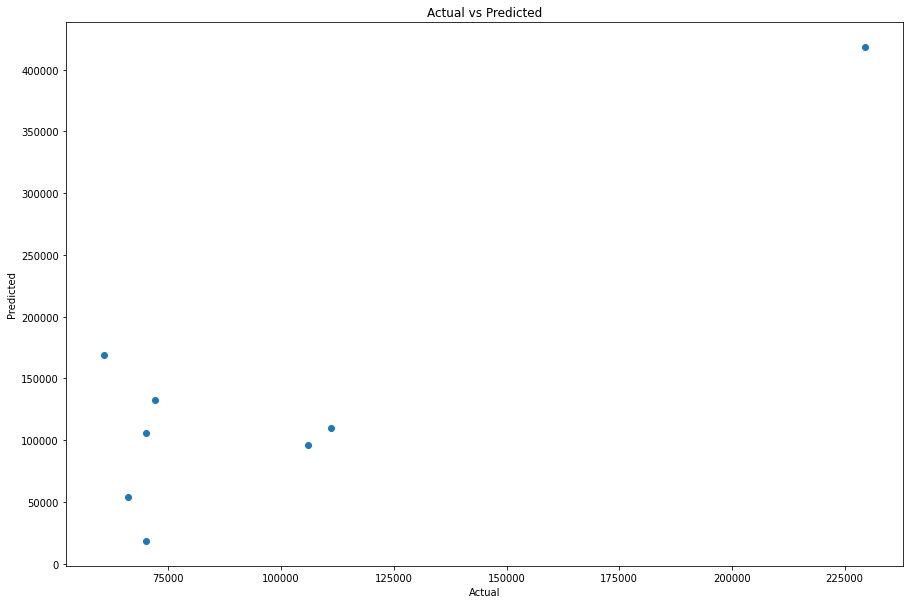

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

predicted values

In [24]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
#pred_y_df[0:20]
pred_y_df

,Actual Value,Predicted value,Difference
0,70000,18199.048211,51800.951789
1,60710,168525.547706,-107815.547706
2,106000,95650.805946,10349.194054
3,229500,418411.921296,-188911.921296
4,111000,109882.921899,1117.078101
5,66100,53561.807393,12538.192607
6,72000,132285.076558,-60285.076558
7,70108,105622.415897,-35514.415897
